## KMEANS Batch

#### Import Libraries, Create SparkContext and Loading de Data

In [1]:
import findspark
findspark.init()

import pandas
import matplotlib.pyplot as plt
from pyspark import SparkContext, SQLContext
from pyspark.ml.clustering import KMeans
from pyspark.ml.evaluation import ClusteringEvaluator

sc = SparkContext("local[2]", "KMEANS_batch")
sc.setLogLevel("ERROR")

sqlContext = SQLContext(sc)

# Loads data.
dataset = sqlContext.read.format("libsvm").load("sample_kmeans_data.txt")

#### Selecting the size of the input data

In [17]:
# dataset length, max = 5000 (is the input data maximum size) 
#n = 50
#n = 500
#n = 1000
n = 2000

data = dataset.limit(n)

#### KMEANS: Creating the Model, Fitting the Model, Evaluating the Model

In [18]:
# Select the number of clusters for the K-Means
n_clusters = 5

# Trains a k-means model.
kmeans = KMeans().setK(n_clusters).setSeed(1)
model = kmeans.fit(data)

# Make predictions
predictions = model.transform(data)

# Evaluate clustering by computing Silhouette score
evaluator = ClusteringEvaluator()
silhouette = evaluator.evaluate(predictions)

#### KMEANS Results: Showing the error and the cluster centers

In [19]:
# Shows the result.
print("Silhouette with squared euclidean distance = " + str(silhouette))
centers = model.clusterCenters()
print("Cluster Centers: ")
center_x=[]
center_y=[]
for center in centers:
    print(center)
    center_x=center_x + [center[0]]
    center_y=center_y + [center[1]]

Silhouette with squared euclidean distance = 0.697128598698396
Cluster Centers: 
[  0.72145973 -58.17961382]
[-117.12012675   -4.44508274]
[ 72.78309774 176.3023298 ]
[185.19105437   2.51530247]
[ -7.85676875 107.91130005]


#### Plotting

In [20]:
# First we get the data in the appropriate format
points=data.toPandas().features
label=data.toPandas().label
result = predictions.toPandas().prediction

points_x = []
points_y = []
for point in points:
    points_x=points_x + [point.toArray()[0]]
    points_y=points_y + [point.toArray()[1]]

In [21]:
# We save the cluster centers for each execution of the K-Means
#center_x_50=center_x
#center_y_50=center_y
#result_50 = result
#center_x_500=center_x
#center_y_500=center_y
#result_500 = result
#center_x_1000=center_x
#center_y_1000=center_y
#result_1000 = result
center_x_2000=center_x
center_y_2000=center_y
result_2000 = result

(-225, 225)

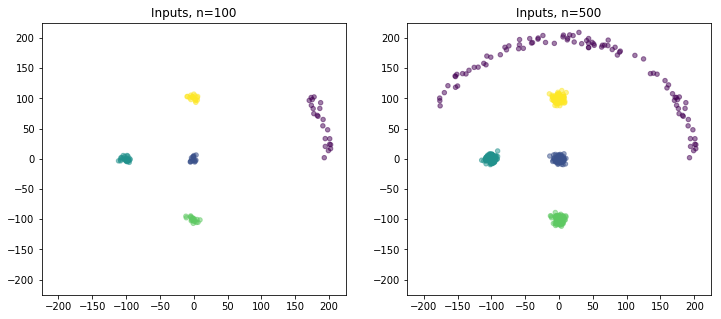

In [22]:
# We plot de Input points received and the colour shows the process that generate the point
fig, axs = plt.subplots(1, 2)
fig.set_size_inches(12,5)
axs[0].scatter(points_x[:100], points_y[:100], c=label[:100], s=20, alpha=0.5)
axs[0].set_title('Inputs, n=100')
axs[0].set_xlim(-225, 225)
axs[0].set_ylim(-225, 225)
axs[1].scatter(points_x[:500], points_y[:500], c=label[:500], s=20, alpha=0.5)
axs[1].set_title('Inputs, n=500')
axs[1].set_xlim(-225, 225)
axs[1].set_ylim(-225, 225)

(-225, 225)

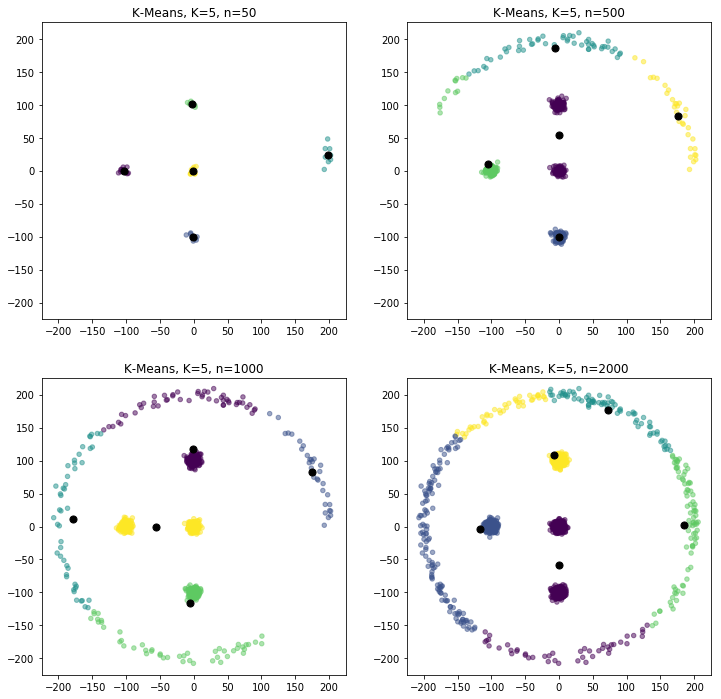

In [23]:
# Now, we plot de cluster centers, and the predicted cluster label for each point is represented in a different colour
fig, axs = plt.subplots(2, 2)
fig.set_size_inches(12,12)
axs[0, 0].scatter(points_x[:50], points_y[:50], c=result_50, s=20, alpha=0.5)
axs[0, 0].scatter(center_x_50, center_y_50, c='black', s=50, alpha=1)
axs[0, 0].set_title('K-Means, K=5, n=50')
axs[0, 0].set_xlim(-225, 225)
axs[0, 0].set_ylim(-225, 225)
axs[0, 1].scatter(points_x[:500], points_y[:500], c=result_500, s=20, alpha=0.5)
axs[0, 1].scatter(center_x_500, center_y_500, c='black', s=50, alpha=1)
axs[0, 1].set_title('K-Means, K=5, n=500')
axs[0, 1].set_xlim(-225, 225)
axs[0, 1].set_ylim(-225, 225)
axs[1, 0].scatter(points_x[:1000], points_y[:1000], c=result_1000, s=20, alpha=0.5)
axs[1, 0].scatter(center_x_1000, center_y_1000, c='black', s=50, alpha=1)
axs[1, 0].set_title('K-Means, K=5, n=1000')
axs[1, 0].set_xlim(-225, 225)
axs[1, 0].set_ylim(-225, 225)
axs[1, 1].scatter(points_x[:2000], points_y[:2000], c=result_2000, s=20, alpha=0.5)
axs[1, 1].scatter(center_x_2000, center_y_2000, c='black', s=50, alpha=1)
axs[1, 1].set_title('K-Means, K=5, n=2000')
axs[1, 1].set_xlim(-225, 225)
axs[1, 1].set_ylim(-225, 225)